<a href="https://colab.research.google.com/github/MohamedMukhtar89CN/MMukhtar_Ibrahim-_app/blob/main/Compiled_Model_As_Final_Project_Loan_Approval_Prediction_DS410_M_Mukhtar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/Loan approval prediction (1).csv')

In [ ]:
df = pd.read_csv('/content/Loan approval prediction (1).csv')
print(df.iloc[0])

id                                    0
person_age                           37
person_income                     35000
person_home_ownership              RENT
person_emp_length                     0
loan_intent                   EDUCATION
loan_grade                            B
loan_amnt                          6000
loan_int_rate                     11.49
loan_percent_income                0.17
cb_person_default_on_file             N
cb_person_cred_hist_length           14
loan_status                           0
Name: 0, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  int64  
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(2), int64(7), object

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

In [ ]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                                  id  person_age  person_income  \
id                          1.000000    0.008608      -0.001896   
person_age                  0.008608    1.000000       0.102176   
person_income              -0.001896    0.102176       1.000000   
person_emp_length           0.005376    0.121276       0.164042   
loan_amnt                  -0.000403    0.050378       0.310942   
loan_int_rate              -0.003454    0.009653      -0.057611   
loan_percent_income        -0.002677   -0.031975      -0.280314   
cb_person_cred_hist_length  0.008139    0.874260       0.082727   
loan_status                -0.008138   -0.001130      -0.169956   

                            person_emp_length  loan_amnt  loan_int_rate  \
id                                   0.005376  -0.000403      -0.003454   
person_age                           0.121276   0.050378       0.009653   
person_income                        0.164042   0.310942      -0.057611   
person_emp_length            

In [ ]:
df = pd.read_csv('/content/Loan approval prediction (1).csv')
categorical_columns = ['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df['cb_person_cred_hist_length'] = label_encoder.fit_transform(df['cb_person_cred_hist_length'])
    df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
    df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
    df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
    df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])


In [ ]:

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


   id  person_age  person_income  person_home_ownership  person_emp_length  \
0   0          37          35000                      3                  0   
1   1          22          56000                      2                  6   
2   2          29          28800                      2                  8   
3   3          30          70000                      3                 14   
4   4          22          60000                      3                  2   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            1           1       6000          11.49                 0.17   
1            3           2       4000          13.35                 0.07   
2            4           0       6000           8.90                 0.21   
3            5           1      12000          11.11                 0.17   
4            3           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_statu

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.fillna(df.mean(), inplace=True)


In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

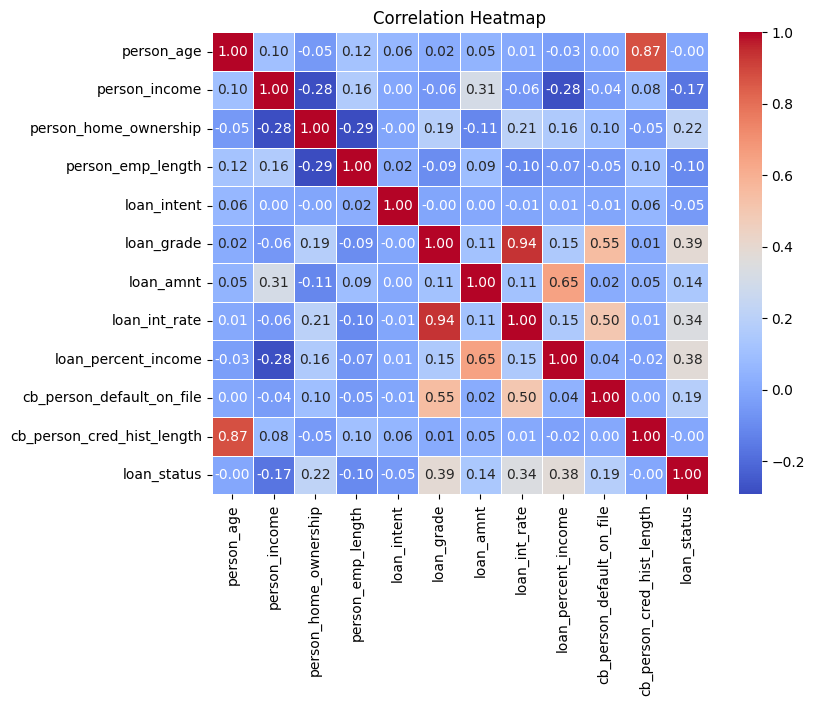

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

## Encoding of categorical columns

In [ ]:
categorical_columns = ['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df['cb_person_cred_hist_length'] = label_encoder.fit_transform(df['cb_person_cred_hist_length'])
    df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
    df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
    df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
    df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])

In [ ]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,int64
person_emp_length,int64
loan_intent,int64
loan_grade,int64
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64
cb_person_default_on_file,int64


In [ ]:
# Scale numerical features for better clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file']])

df_scaled = pd.DataFrame(scaled_features, columns=['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

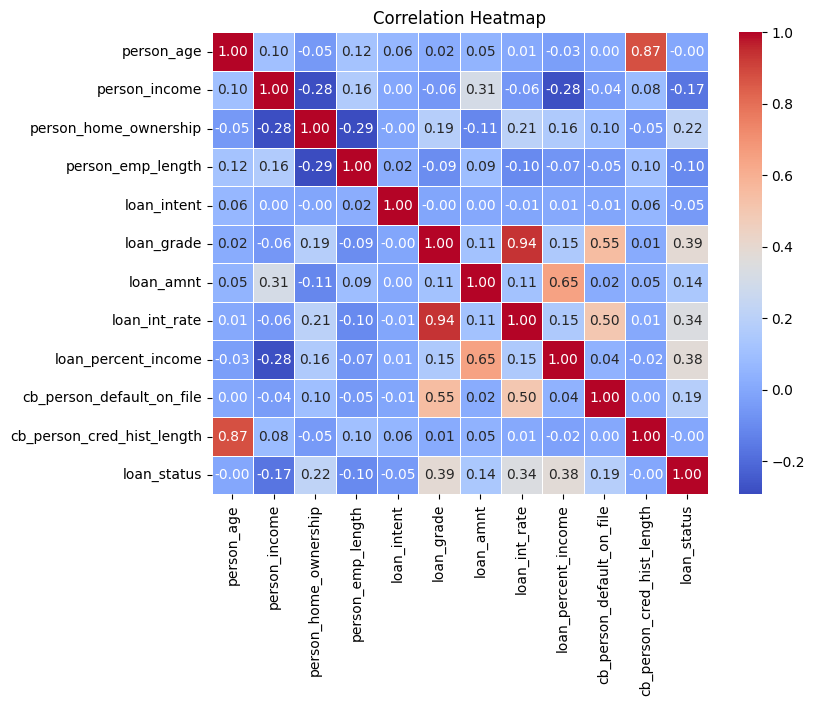

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.head(15)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,3,0,1,1,6000,11.49,0.17,0,12,0
1,22,56000,2,6,3,2,4000,13.35,0.07,0,0,0
2,29,28800,2,8,4,0,6000,8.90,0.21,0,8,0
3,30,70000,3,14,5,1,12000,11.11,0.17,0,3,0
4,22,60000,3,2,3,0,6000,6.92,0.10,0,1,0
5,27,45000,3,2,5,0,9000,8.94,0.20,0,3,0
6,25,45000,0,9,1,0,12000,6.54,0.27,0,1,0
7,21,20000,3,0,4,2,2500,13.49,0.13,1,1,0
8,37,69600,3,11,1,3,5000,14.84,0.07,1,9,0
9,35,110000,0,0,0,2,15000,12.98,0.14,1,4,0


In [ ]:
df.info

<bound method DataFrame.info of        person_age  person_income  person_home_ownership  person_emp_length  \
0              37          35000                      3                  0   
1              22          56000                      2                  6   
2              29          28800                      2                  8   
3              30          70000                      3                 14   
4              22          60000                      3                  2   
...           ...            ...                    ...                ...   
58640          34         120000                      0                  5   
58641          28          28800                      3                  0   
58642          23          44000                      3                  7   
58643          22          30000                      3                  2   
58644          31          75000                      0                  2   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0                1           1       6000          11.49                 0.17   
1                3           2       4000          13.35                 0.07   
2                4           0       6000           8.90                 0.21   
3                5           1      12000          11.11                 0.17   
4                3           0       6000           6.92                 0.10   
...            ...         ...        ...            ...                  ...   
58640            1           3      25000          15.95                 0.21   
58641            3           2      10000          12.73                 0.35   
58642            1           3       6800          16.00                 0.15   
58643            1           0       5000           8.90                 0.17   
58644            5           1      15000          11.11                 0.20   

       cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                              0                          12            0  
1                              0                           0            0  
2                              0                           8            0  
3                              0                           3            0  
4                              0                           1            0  
...                          ...                         ...          ...  
58640                          1                           8            0  
58641                          0                           6            1  
58642                          0                           0            1  
58643                          0                           1            0  
58644                          0                           3            0  

[58645 rows x 12 columns]>

In [ ]:
df.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,1.673578,4.701015,2.519430,1.066638,9217.556518,10.677874,0.159238,0.148384,3.813556,0.142382
std,6.033216,3.793111e+04,1.452534,3.959784,1.722896,1.046181,5563.807384,3.034697,0.091692,0.355484,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,4.200000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,7.880000,0.090000,0.000000,1.000000,0.000000
50%,26.000000,5.800000e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,10.750000,0.140000,0.000000,2.000000,0.000000
75%,30.000000,7.560000e+04,3.000000,7.000000,4.000000,2.000000,12000.000000,12.990000,0.210000,0.000000,6.000000,0.000000
max,123.000000,1.900000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,28.000000,1.000000


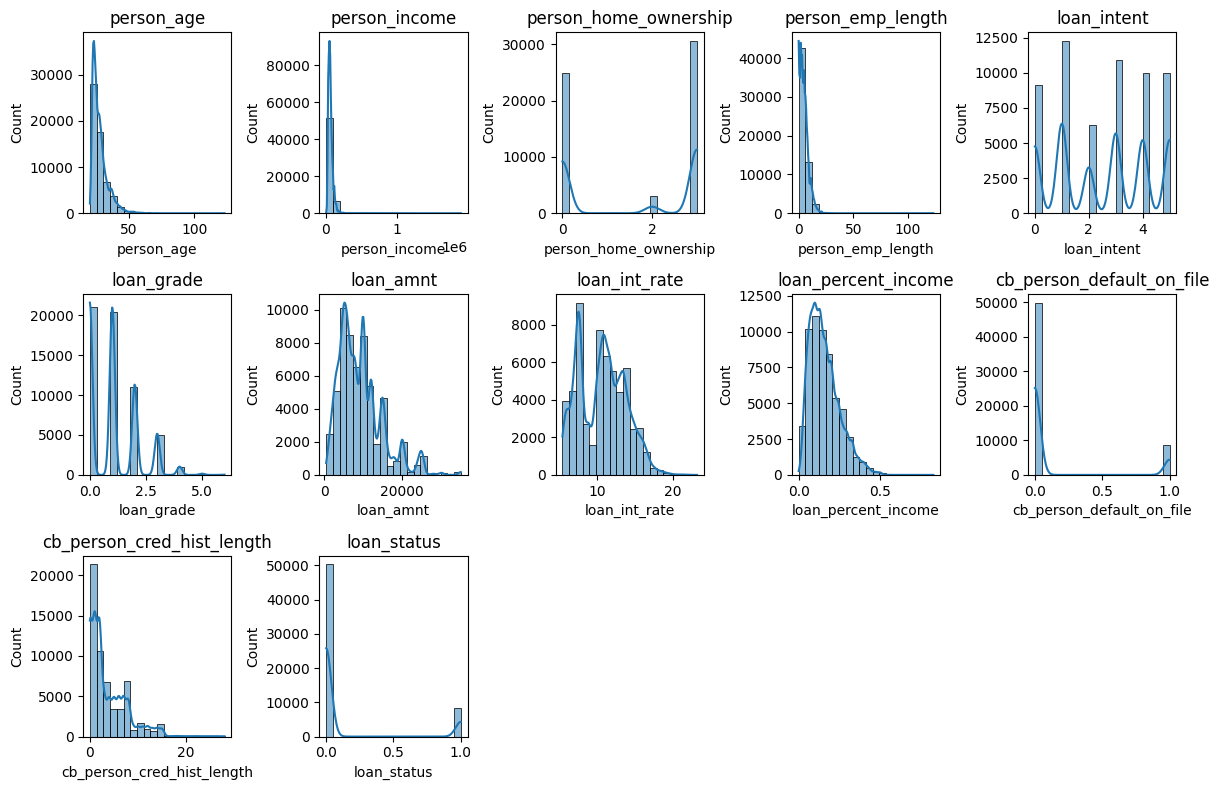

In [ ]:
# Data Distribution
numerical_features = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status']


plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Manage outliers

In [ ]:
df.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,1.673578,4.701015,2.519430,1.066638,9217.556518,10.677874,0.159238,0.148384,3.813556,0.142382
std,6.033216,3.793111e+04,1.452534,3.959784,1.722896,1.046181,5563.807384,3.034697,0.091692,0.355484,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,4.200000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,7.880000,0.090000,0.000000,1.000000,0.000000
50%,26.000000,5.800000e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,10.750000,0.140000,0.000000,2.000000,0.000000
75%,30.000000,7.560000e+04,3.000000,7.000000,4.000000,2.000000,12000.000000,12.990000,0.210000,0.000000,6.000000,0.000000
max,123.000000,1.900000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,28.000000,1.000000


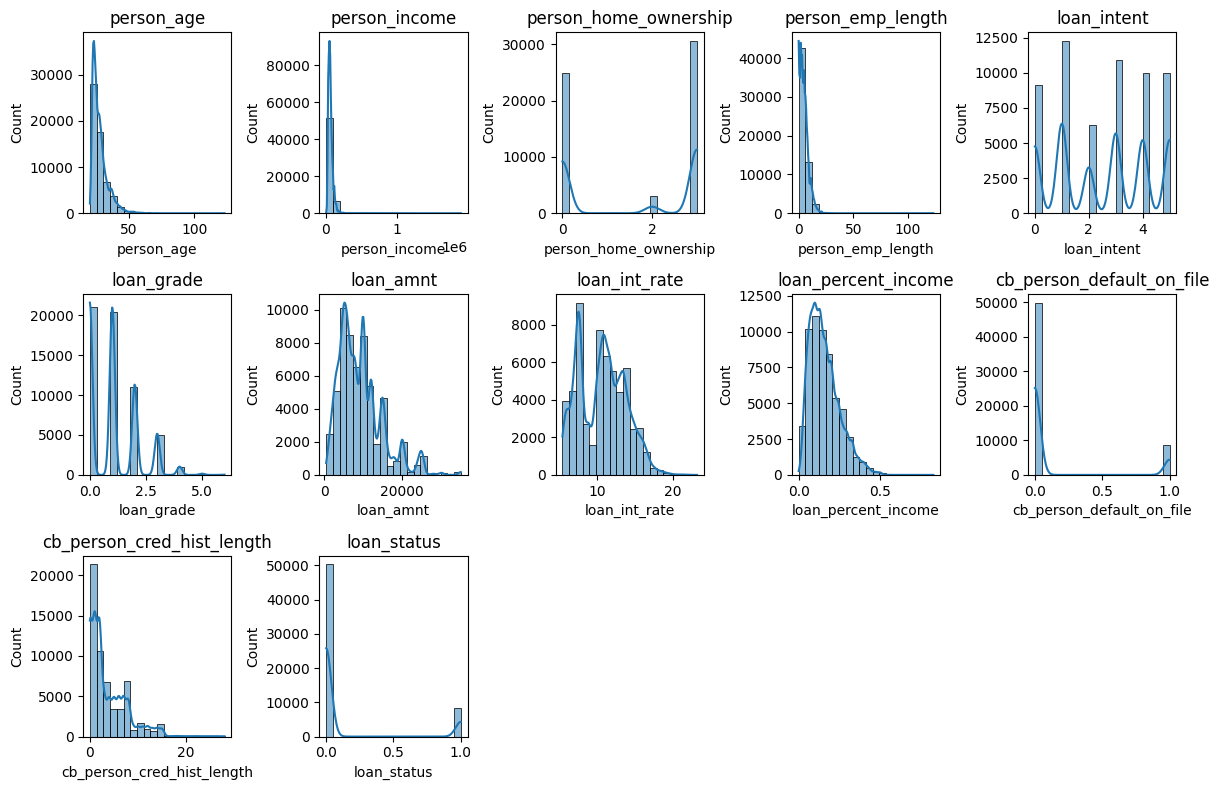

In [ ]:
# Data Distribution
numerical_features = ['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status']


plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [ ]:
categorical_columns = ['person_home_ownership',
       'loan_intent', 'loan_grade', 'cb_person_default_on_file']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df['cb_person_cred_hist_length'] = label_encoder.fit_transform(df['cb_person_cred_hist_length'])
    df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
    df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
    df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
    df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])

    # Smooth outliers using a rolling median
df["person_age"] = df["person_age"].rolling(window=5, center=True).median()
df["person_emp_length"] = df["person_emp_length"].rolling(window=5, center=True).median()
df["loan_percent_income"] = df["loan_percent_income"].rolling(window=5, center=True).median()
df["cb_person_cred_hist_length"] = df["cb_person_cred_hist_length"].rolling(window=5, center=True).median()
df["loan_int_rate"] = df["loan_int_rate"].rolling(window=5, center=True).median()

df.fillna(df.mean(), inplace=True)

# Save the smoothed dataset
df.to_csv("Smoothed_data.csv", index=False)
print("Outliers have been smoothed and saved as 'Smoothed_data.csv'.")

Outliers have been smoothed and saved as 'Smoothed_data.csv'.


In [ ]:
df = pd.read_csv('/content/Smoothed_data.csv')


df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,26.19006,35000,3,4.12113,1,1,6000,10.621029,0.146128,0,3.251633,0
1,26.19006,56000,2,4.12113,3,2,4000,10.621029,0.146128,0,3.251633,0
2,27.00000,28800,2,6.00000,4,0,6000,10.612286,0.170000,0,4.000000,0


# Model creation

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [ ]:
df.dtypes

,0
person_age,float64
person_income,int64
person_home_ownership,int64
person_emp_length,float64
loan_intent,int64
loan_grade,int64
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64
cb_person_default_on_file,int64


In [ ]:
# Split data
# smoothed_data.csv
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_status'])
# Features
y = df['loan_status']
# Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
# Load dataset
file_path = "Loan approval prediction (1).csv"
# Update with the correct file path
df = pd.read_csv("/content/Smoothed_data.csv")
# Create and train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
# Try 'linear' or 'poly' kernels for experimentation
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)




X_train shape: (46916, 11)
y_train shape: (46916,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

df = pd.read_csv('/content/Smoothed_data.csv')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "Loan approval prediction (1).csv"
# Update with the correct file path
df = pd.read_csv("/content/Smoothed_data.csv")




# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

Accuracy of classifier & model

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9419387842100776


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9419387842100776


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[9918  169]
 [ 496 1146]]


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     10087
           1       0.87      0.70      0.78      1642

    accuracy                           0.94     11729
   macro avg       0.91      0.84      0.87     11729
weighted avg       0.94      0.94      0.94     11729



In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # If model supports probabilities
print("ROC-AUC Score:", auc)


ROC-AUC Score: 0.9324390591138461


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-validation Scores: [0.9365942  0.9376532  0.94255569 0.94148993 0.9372269 ]
Mean CV Score: 0.9391039839240565


In [ ]:
# Model is already trained
y_pred = model.predict(X_test)
# Predict for test set
print("Predictions:\n", y_pred)


Predictions:
 [0 0 0 ... 0 0 0]


In [ ]:
import numpy as np
df = pd.read_csv("Smoothed_data.csv")
new_data = np.array([[45000, 35, 1, 0, 750, 1, 1, 25000, 3, 0, 1, 5]])

prediction = model.predict([[35, 1, 0, 750, 1, 1, 15000, 3, 0, 1, 5]])

print("Loan Approval Prediction:", prediction)


Loan Approval Prediction: [0]


In [ ]:
import numpy as np
df = pd.read_csv("/content/Smoothed_data.csv")
new_data = np.array([[45000, 35, 1, 0, 750, 1, 1, 25000, 3, 0, 1, 5]])

prediction = model.predict([[22, 30000, 1, 3, 2, 2, 2, 50000, 16, 0.2, 5]])

loan_status = "Rejected" if prediction[0] == 0 else "Approved"

print(f"Loan Approval Status: {loan_status}")

Loan Approval Status: Rejected


In [ ]:


prediction = model.predict([[25, 40000, 1, 18, 1, 1, 5000, 9, 20, 1, 3]])



loan_status = "Rejected" if prediction[0] == 0 else "Approved"

print(f"Loan Approval Status: {loan_status}")

Loan Approval Status: Approved


In [ ]:
# Assume your model has already made a binary prediction
prediction = model.predict([[25, 40000, 1, 18, 1, 1, 5000, 9, 20, 1, 3]])  # Returns 0 or 1

# Convert the integer result into a string label
loan_status = "Rejected" if prediction[0] == 0 else "Approved"

print(f"Loan Approval Status: {loan_status}")


Loan Approval Status: Approved


In [ ]:
import numpy as np

predictions = model.predict(input_data)  # Returns an array of 0s and 1s
loan_statuses = np.where(predictions == 0, "Rejected", "Approved")

print(loan_statuses)  # Displays array of "Approved" or "Rejected"


In [ ]:
import pickle

# Load the trained model (Ensure you have saved the model previously)
model = pickle.load(open("/content/loan_model.pkl, "rb"))

SyntaxError: unterminated string literal (detected at line 4) (<ipython-input-69-4fb4158b4531>, line 4)

In [ ]:
import numpy as np
df = pd.read_csv("Smoothed_data.csv")
new_data = np.array([[45000, 35, 1, 0, 750, 1, 1, 25000, 3, 0, 1, 5]])

prediction = model.predict([[35, 1, 0, 750, 1, 1, 15000, 3, 0, 1, 5]])
print("Loan Approval Prediction:", prediction)

predicted_Rejected = classification_model_loaded.predict(new_customer_with_loan_status)
predicted_Rejected_status = "Rejected" if predicted_exit[0] == 1 else "Approved"

print(f"Predicted Loan Score: {predicted_credit_score[0]:.2f}")
print(f"Customer Prediction: {exit_status}")

Loan Approval Prediction: [0]


NameError: name 'new_customer_with_loan_status' is not defined

in a successfull model prediction is binary which is either 0 or 1, I need to write a code the change the integers resulted to either Rejected ( in case the prediction is zero ) else approved if the prediction is 1.

In [ ]:
import joblib

# Save models
joblib.dump(model, "loan_model.pkl")

# Save scalers
joblib.dump(scaler, "scaler.pkl")

# Save label encoders
joblib.dump(encoder, "label_encoder.pkl")

print(" Models, scalers, and encoders saved successfully!")


 Models, scalers, and encoders saved successfully!


In [ ]:
pip freeze > requirements.txt


In [ ]:
from flask import Flask, request, jsonify
import pickle




In [ ]:
df = pd.read_csv('/content/Smoothed_data.csv')
df.fillna(df.mean(), inplace=True)

df.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,26.179073,35000,3,4.117448,1,1,6000,10.624317,0.145991,0,2.834774,0
1,26.179073,56000,2,4.117448,3,2,4000,10.624317,0.145991,0,2.834774,0
2,26.179073,28800,2,4.117448,4,0,6000,10.624317,0.145991,0,3.000000,0
3,26.179073,70000,3,4.117448,5,1,12000,10.624317,0.145991,0,3.000000,0
4,26.179073,60000,3,4.117448,3,0,6000,10.624317,0.145991,0,3.000000,0
5,26.179073,45000,3,4.117448,5,0,9000,10.624317,0.145991,0,3.000000,0
6,26.179073,45000,0,4.117448,1,0,12000,10.624317,0.145991,0,3.000000,0
7,26.179073,20000,3,4.117448,4,2,2500,10.624317,0.145991,1,3.000000,0
8,26.179073,69600,3,4.117448,1,3,5000,10.624317,0.145991,1,3.000000,0
9,26.179073,110000,0,4.117448,0,2,15000,10.624317,0.145991,1,3.000000,0


In [ ]:
df = pd.read_csv('/content/Loan approval prediction (1).csv')
print(df.iloc[0])
print(df.iloc[1])

id                                    0
person_age                           37
person_income                     35000
person_home_ownership              RENT
person_emp_length                     0
loan_intent                   EDUCATION
loan_grade                            B
loan_amnt                          6000
loan_int_rate                     11.49
loan_percent_income                0.17
cb_person_default_on_file             N
cb_person_cred_hist_length           14
loan_status                           0
Name: 0, dtype: object
id                                  1
person_age                         22
person_income                   56000
person_home_ownership             OWN
person_emp_length                   6
loan_intent                   MEDICAL
loan_grade                          C
loan_amnt                        4000
loan_int_rate                   13.35
loan_percent_income              0.07
cb_person_default_on_file           N
cb_person_cred_hist_length          2
l

In [ ]:
import numpy as np
import joblib

# Load models
credit_model_loaded = joblib.load("/content/loan_model.pkl")
classification_model_loaded = joblib.load("/content/loan_model.pkl")

# Load scalers
scaler_loaded = joblib.load("scaler.pkl")

# Load encoders
label_encoder_person_home_ownership_loaded = joblib.load("/content/label_encoder.pkl")
label_encoder_loan_intent_loaded = joblib.load("/content/label_encoder.pkl")
label_encoder_loan_grade_loaded = joblib.load("/content/label_encoder.pkl")
label_encoder_cb_person_default_on_file = joblib.load("/content/label_encoder.pkl")
label_encoder_loan_status_loaded = joblib.load("/content/label_encoder.pkl")



new_customer_raw = [26.179073,35000, "RENT", 0, "EDUCATION", "B", 6000, 11.49, 0.17, 14, 4, "N"]

# Encoding categorical features
new_customer_encoded = [
    label_encoder_person_home_ownership_loaded.transform([new_customer_raw[0]])[2],  # Encode person_home_ownership
    label_encoder_loan_intent_loaded.transform([new_customer_raw[0]])[4],  # Encode loan_intent
    label_encoder_loan_grade_loaded.transform([new_customer_raw[0]])[5],
    label_encoder_cb_person_default_on_file.transform([new_customer_raw[0]])[9],
    label_encoder_loan_status_loaded.transform([new_customer_raw[0]])[11]
] + new_customer_raw[2:]  # Add numerical values

# Convert to NumPy array
new_customer_input = np.array([new_customer_encoded])

# Scale input data
new_customer_scaled = scaler_loaded.transform(new_customer_input)

# Predict credit score
predicted_credit_score_log = credit_model_loaded.predict(new_customer_scaled)
predicted_credit_score = np.expm1(predicted_credit_score_log)

# Add predicted credit score to input features
new_customer_with_credit_score = np.hstack((new_customer_scaled, predicted_credit_score.reshape(-1, 1)))

# Predict if the customer will leave
predicted_exit = classification_model_loaded.predict(new_customer_with_credit_score)
exit_status = "Rejected" if predicted_exit[0] == 1 else "Approved"

print(f"Predicted Loan Score: {predicted_credit_score[0]:.2f}")
print(f"Customer Prediction: {exit_status}")


ValueError: y contains previously unseen labels: [np.int64(26)]